In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

In [2]:
# Configurando o fundo branco padrão no matplotlib
plt.rcParams['figure.facecolor'] = '#ffffff'

In [3]:
dataset = MNIST(root='data/', download=True, transform=ToTensor())

image.shape: torch.Size([1, 28, 28])
Label 5


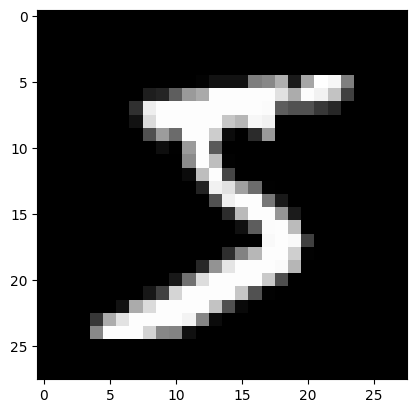

In [4]:
image, label = dataset[0]
print("image.shape:", image.shape)
plt.imshow(image.permute(1, 2, 0), cmap="gray")
print("Label", label)

In [5]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
VAL_SIZE = 10000
train_size = len(dataset) - VAL_SIZE

train_ds, val_ds = random_split(dataset, [train_size, VAL_SIZE])
len(train_ds), len(val_ds)

(50000, 10000)

In [7]:
BATCH_SIZE = 128

In [8]:
train_loader = DataLoader(
    train_ds, BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True
)

val_loader = DataLoader(val_ds, BATCH_SIZE * 2, num_workers=4, pin_memory=True)

images.shape: torch.Size([128, 1, 28, 28])


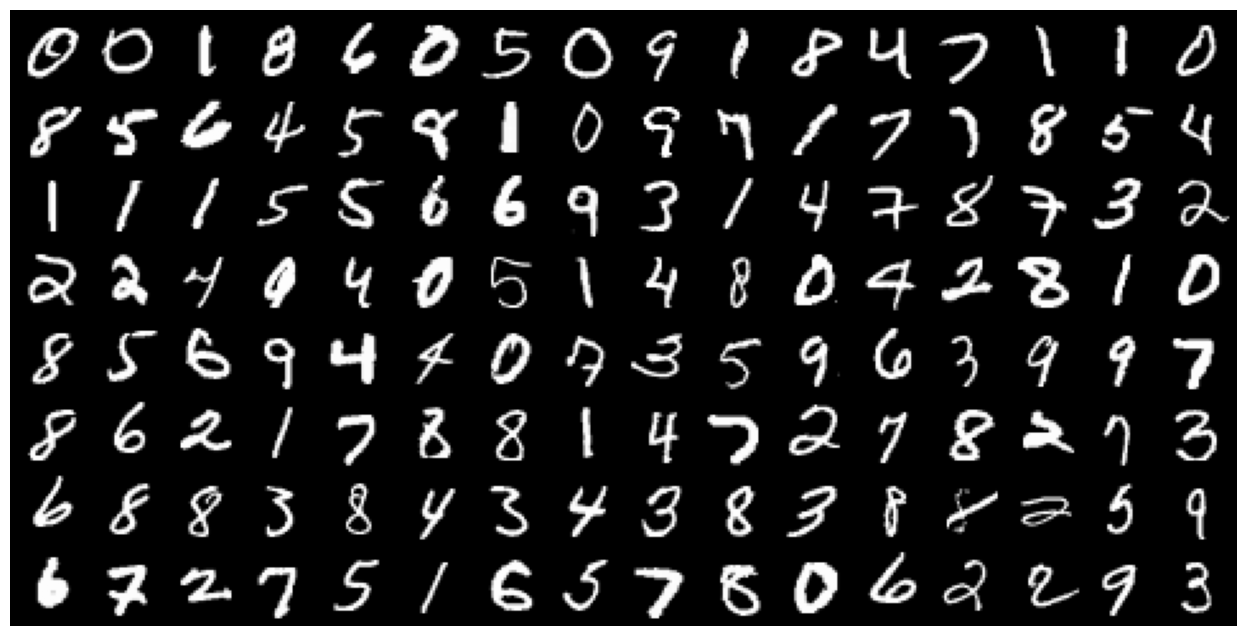

In [9]:
for images, _ in train_loader:
    print("images.shape:", images.shape)
    plt.figure(figsize=(16, 8))
    plt.axis("off")
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

## Camadas ocultas, funções de ativação e não-lineariedade

Criaremos uma rede neural com duas camadas: Uma oculta e outra de saída. Também usaremos uma função de ativação entre elas.

Primeiro, criamos um lote de tensores de entrada. Planificaremos o tensor de imagem `[1x28x28]` em `[1x784]` para passarmos para um objeto `nn.Linear`

In [10]:
for images, labels in train_loader:
    print("images.shape:", images.shape)
    inputs = images.reshape(-1, 784)
    print("inputs.shape:", inputs.shape)
    break

images.shape: torch.Size([128, 1, 28, 28])
inputs.shape: torch.Size([128, 784])


Agora criamos o objeto `nn.Linear` que servirá como nossa camada oculta. Configuraremos o tamanho da saída da camada oculta para 32. Esse número pode descrescer ou crescer para mudar a capacidade de aprendizado do modelo.

In [11]:
input_size = inputs.shape[-1]
HIDDEN_SIZE = 32

In [12]:
layer1 = nn.Linear(input_size, HIDDEN_SIZE)

Agora calculamos as saídas intermediárias para os lotes de imagens passando `inputs` através de `layer1`

In [13]:
inputs.shape

torch.Size([128, 784])

In [14]:
layer1_outputs = layer1(inputs)
print("layer1_outputs.shape:", layer1_outputs.shape)

layer1_outputs.shape: torch.Size([128, 32])


Os vetores de tamanho `784` da imagem são transformados em vetores de saídas intermediárias com tamanho `32` performando a multiplicação da matriz `inputs` com a matriz `layer1` transposta e adicionando o bias.

In [15]:
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias
layer1_outputs_direct.shape

torch.Size([128, 32])

In [16]:
torch.allclose(layer1_outputs, layer1_outputs_direct, 1e-3)

# ESPERAMOS TRUE

True

In [17]:
F.relu(torch.tensor([[1, -1, 0], [-0.1, 0.2, 0.3]]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.3000]])

In [18]:
relu_outputs = F.relu(layer1_outputs)
print("min(layer1_outputs):", torch.min(layer1_outputs).item())
print("min(relu_outputs):", torch.min(relu_outputs).item())

min(layer1_outputs): -0.7062684297561646
min(relu_outputs): 0.0


Agora que aplicamos uma função de ativação não linear, `relu_outputs` e `inputs` não tem relação linear. Nos referimos a `ReLU` como função de ativação porque para cada entrada, algumas saídas serão ativadas e outras não.

In [19]:
torch.allclose(layer1_outputs, relu_outputs, 1e-0)

# ESPERAMOS FALSE

False

In [20]:
OUTPUT_SIZE = 10
layer2 = nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE)

In [21]:
layer2_outputs = layer2(relu_outputs)
print("layer2_outputs.shape:", layer2_outputs.shape)

layer2_outputs.shape: torch.Size([128, 10])


In [22]:
F.cross_entropy(layer2_outputs, labels)

tensor(2.3058, grad_fn=<NllLossBackward0>)

In [23]:
outputs = (F.relu(inputs @ layer1.weight.t() + layer1.bias)) @ layer2.weight.t() + layer2.bias

In [24]:
torch.allclose(outputs, layer2_outputs, 1e-3)

# ESPERAMOS TRUE

True

In [25]:
outputs2 = (inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias

In [26]:
# Criamos uma única clase para substituir a camada linear

combined_layer = nn.Linear(input_size, OUTPUT_SIZE)

combined_layer.weight.data = layer2.weight @ layer1.weight
combined_layer.bias.data = layer1.bias @ layer2.weight.t() + layer2.bias

In [27]:
# Mesmo que a camada combinada
outputs3 = inputs @ combined_layer.weight.t() + combined_layer.bias

In [28]:
torch.allclose(outputs3, outputs2, 1e-3)

# ESPERAMOS TRUE

True

## Modelo

Agora criaremos uma rede neural com duas camadas:

* 1. Em vez de uma única `nn.Linear` para transformar um lote de entradas em saída, usaremos duas `nn.Linear`

* 2. A primeira transformará a matriz de entrada em `batch_size x 784` em uma matriz de saída intermediária `batch_size x hidden_size`

* 3. Aplicaremos uma ativação não linear para intermediar as saídas. A função de ativação transforma elementos indivuais da matriz

* 4. O resultado da função de ativação é passada para a segunda camada, que transformará em uma matriz de tamanho `batch_size x 10`. POdemos usar essa saída para computar a perda e ajustar os pesos usando o gradiente de descida.

In [29]:
# Definição do modelo
class MnistModel(nn.Module):
    """Rede neural feedforward com 1 camada oculta"""

    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()

        # camada de entrada
        self.linear1 = nn.Linear(in_size, hidden_size)

        # camada oculta
        self.linear2 = nn.Linear(hidden_size, out_size)

    def forward(self, xb):
        # Planificação da imagem
        xb = xb.view(xb.size(0), -1)

        # Obter saídas intermediárias usando camada oculta
        out = self.linear1(xb)

        # Aplicar função de ativação
        out = F.relu(out)

        # Obter predição usando a camada de saída
        return self.linear2(out)

    def training_step(self, batch):
        images, labels = batch
        out = self(images)  # Gerar previsões
        return F.cross_entropy(out, labels)  # Calcular e retornar a perda

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)  # Gerar previsões
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)  # Calcular a acurácia
        return {"val_loss": loss.detach(), "val_acc": acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  # Combina as perdas

        batch_accs = [x["val_acc"] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()  # Combina as acurácias

        return {"val_loss": epoch_loss.item(), "val_acc": epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print(
            "Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(
                epoch + 1, result["val_loss"], result["val_acc"]
            )
        )

In [30]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [31]:
INPUT_SIZE = 784
HIDDEN_SIZE = 32  # Pode ser alterado
NUM_CLASSES = 10

In [32]:
model = MnistModel(INPUT_SIZE, HIDDEN_SIZE, NUM_CLASSES)

In [33]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [34]:
for images, labels in train_loader:
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print("Loss:", loss.item())
    break

Loss: 2.2891955375671387


In [35]:
print("outputs.shape:", outputs.shape)
print("Sample outputs:\n", outputs[:2].data)

outputs.shape: torch.Size([128, 10])
Sample outputs:
 tensor([[-0.0576,  0.0033,  0.1168,  0.0284,  0.0671,  0.0687,  0.1786,  0.0410,
          0.1740,  0.0800],
        [ 0.0014,  0.0574,  0.0803, -0.0532, -0.0614,  0.1021,  0.1859, -0.0976,
          0.2072,  0.0071]])


### Utilizando GPU

In [36]:
params = 0

for p in model.parameters():
    print(p.numel())
    params += p.numel()

print("Total Params:", params)

25088
32
320
10
Total Params: 25450


In [37]:
torch.cuda.is_available()

True

In [38]:
def get_default_device():
    """Pega o dispositivo GPU se disponível, caso contrário, o CPU"""
    if torch.cuda.is_available():
        return torch.device("cuda")  # GPU
    else:
        return torch.device("cpu")  # CPU

In [39]:
device = get_default_device()
device

device(type='cuda')

In [40]:
def to_device(data, device):
    """Move os tensores para o dispositivo escolhido"""
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [41]:
for images, labels in train_loader:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break

torch.Size([128, 1, 28, 28])
cuda:0


Após mover tudo para a GPU, definiremos a calasse que empacotada os DataLoaders e também moverá para a GPU. Para isso, precisamos apenas do método `__iter__` para recuperar os lotes de data e `__len__` para recuperar o tamanho dos lotes

In [42]:
class DeviceDataLoader:
    """Envolve um DataLoader para mover dados para um dispositivo"""

    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield um lote de dados após mover para o dispositivo"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Número total de lotes"""
        return len(self.dl)

In [43]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

In [44]:
for xb, yb in val_loader:
    print("xb.device:", xb.device)
    print("yb:", yb)
    break

xb.device: cuda:0
yb: tensor([7, 1, 2, 4, 5, 4, 1, 9, 2, 4, 8, 0, 6, 3, 9, 0, 5, 4, 1, 3, 7, 9, 9, 4,
        9, 6, 9, 6, 2, 9, 5, 9, 4, 0, 8, 9, 8, 4, 9, 1, 7, 1, 3, 4, 9, 3, 4, 8,
        7, 6, 4, 2, 5, 4, 3, 8, 0, 6, 0, 1, 9, 7, 9, 5, 2, 5, 5, 8, 6, 5, 9, 6,
        8, 1, 7, 1, 5, 7, 9, 3, 7, 8, 6, 5, 9, 7, 9, 0, 2, 4, 4, 9, 9, 3, 0, 8,
        6, 0, 5, 6, 6, 5, 0, 5, 5, 5, 0, 5, 8, 2, 4, 9, 3, 9, 2, 9, 2, 5, 9, 5,
        7, 4, 2, 7, 1, 2, 4, 9, 0, 8, 2, 0, 3, 2, 5, 5, 8, 5, 4, 4, 3, 3, 2, 0,
        5, 4, 6, 4, 7, 6, 2, 3, 3, 6, 7, 4, 8, 5, 4, 1, 7, 0, 8, 0, 8, 9, 4, 9,
        6, 7, 1, 6, 2, 2, 3, 7, 9, 3, 5, 6, 7, 0, 1, 3, 8, 5, 3, 2, 3, 2, 1, 8,
        9, 6, 4, 0, 6, 0, 0, 6, 6, 2, 0, 0, 9, 3, 0, 1, 9, 8, 8, 7, 1, 9, 0, 2,
        0, 9, 9, 3, 0, 0, 9, 0, 7, 5, 5, 8, 3, 9, 5, 6, 5, 2, 3, 5, 5, 5, 2, 0,
        1, 4, 8, 8, 4, 1, 1, 0, 1, 9, 9, 2, 4, 6, 8, 7], device='cuda:0')


## Treinamento do modelo

In [45]:
def evaluate(model, val_loader):
    """Avalia a precisão do modelo no conjunto de dados de validação"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Treina o modelo usando o otimizador escolhido"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Treinamento de fase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Fase de validação
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Antes de iniciar o treinamento, precisamos garantir que todas as informações necessárias estejam na GPU. Para isso, podemos utilizar `to_device`.

In [46]:
# Modelo (em GPU)
model = MnistModel(INPUT_SIZE, HIDDEN_SIZE, NUM_CLASSES)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [47]:
# Verificação do desempenho do modelo antes do treinamento
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.3047428131103516, 'val_acc': 0.09453125298023224}]

In [48]:
history += fit(5, 0.5, model, train_loader, val_loader)

Epoch [1], val_loss: 0.2254, val_acc: 0.9327
Epoch [2], val_loss: 0.2293, val_acc: 0.9284
Epoch [3], val_loss: 0.1415, val_acc: 0.9600
Epoch [4], val_loss: 0.1388, val_acc: 0.9571
Epoch [5], val_loss: 0.1268, val_acc: 0.9659


In [50]:
history += fit(5, 0.01, model, train_loader, val_loader)

Epoch [1], val_loss: 0.1129, val_acc: 0.9693
Epoch [2], val_loss: 0.1116, val_acc: 0.9702
Epoch [3], val_loss: 0.1107, val_acc: 0.9701
Epoch [4], val_loss: 0.1102, val_acc: 0.9699
Epoch [5], val_loss: 0.1100, val_acc: 0.9695


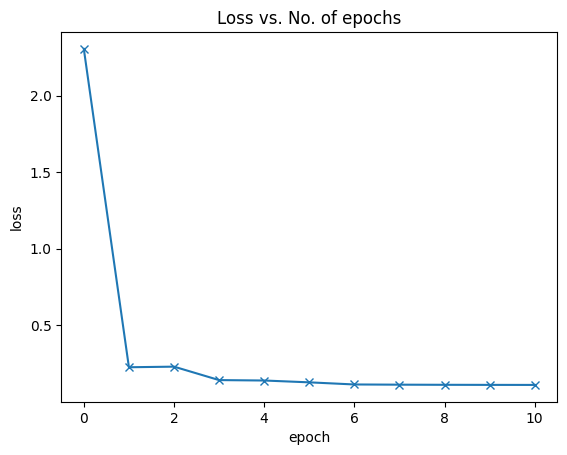

In [51]:
losses = [x["val_loss"] for x in history]
plt.plot(losses, "-x")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss vs. No. of epochs");